In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [7]:
df.describe()


,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [8]:
import seaborn as sns


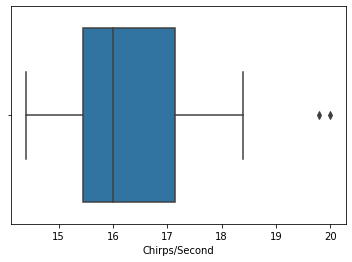

In [9]:
sns.boxplot(x='Chirps/Second',data=df)

In [10]:
from sklearn.model_selection import train_test_split
X = df.loc[:,["Chirps/Second"]].values
y = df.loc[:,"Ground Temperature"].values

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([81.95500217, 72.81016859, 77.76362011, 86.9084537 , 93.00500942])

In [14]:
df1 = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df1

,Actual,Predict
0,80.6,81.955002
1,69.7,72.810169
2,80.6,77.763620
3,84.3,86.908454
4,88.6,93.005009


In [15]:
from sklearn import metrics
print('R2-score:',metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2-score: 0.7669608238962577


0.7669608238962577

In [16]:
regressor.predict([[18]])

array([85.38431477])

In [17]:
from sklearn.model_selection import train_test_split
y = df.loc[:,"Chirps/Second"].values
X = df.loc[:,["Ground Temperature"]].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)
y_pred

array([17.62262884, 16.63484853, 15.71011803, 14.4911551 , 17.2653466 ])

In [20]:
df1 = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df1

,Actual,Predict
0,18.4,17.622629
1,15.0,16.634849
2,15.5,15.710118
3,15.4,14.491155
4,17.2,17.265347


In [21]:
regressor.predict([[95]])

array([19.87140528])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [23]:
df = pd.read_fwf("brain_body.txt")

In [24]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [25]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [26]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [27]:
df = df.drop_duplicates()

In [28]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [31]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upperthreshold = df.Brain.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Brain.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(119.60625, -70.80375000000001)

In [32]:
df.Brain = df.Brain.clip(-70.803750,119.60625)

In [33]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upperthreshold = df.Body.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Body.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(408.625, -238.375)

In [34]:
df.Body = df.Body.clip(-238.375,408.625)

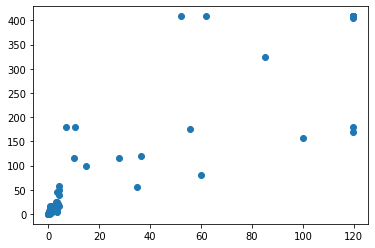

In [35]:
plt.scatter(x='Brain',y='Body',data=df)

In [36]:
df.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


In [37]:
X = df.loc[:,['Brain']].values
y = df.loc[:,"Body"].values


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [39]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = regressor.predict(X_test)
y_pred

array([ 26.25183263,  32.48849898,  35.96582762,  26.63194548,
       360.81097076,  24.10630678, 192.98059002,  29.67284826,
        33.33319419, 360.81097076,  33.89632434,  25.39305916,
       360.81097076])

In [41]:
print("R2_score:",metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2_score: 0.9356394748303506


0.9356394748303506

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

# **Univariant analysis**

In [ ]:
df.Sex.value_counts()

0    38
1    14
Name: Sex, dtype: int64

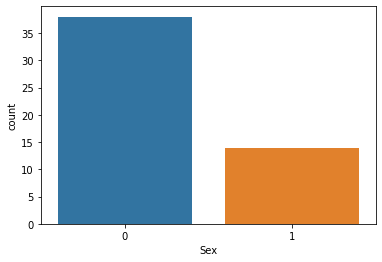

In [ ]:
sns.countplot(x="Sex",data=df)

In [ ]:
df.Rank.value_counts()

3    20
1    18
2    14
Name: Rank, dtype: int64

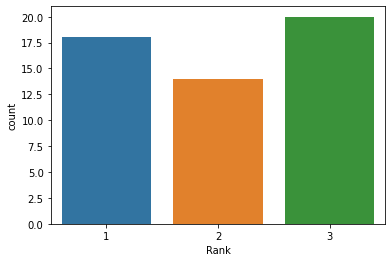

In [ ]:
sns.countplot(x='Rank',data=df)

In [ ]:
df["Year"].value_counts()

9     5
3     5
13    4
1     4
4     4
2     4
0     3
16    3
11    3
8     3
7     3
10    3
6     2
5     2
12    1
15    1
19    1
25    1
Name: Year, dtype: int64

In [ ]:
df.Degree.value_counts()

1    34
0    18
Name: Degree, dtype: int64

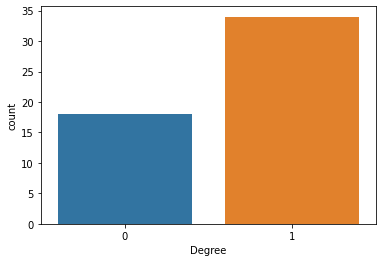

In [ ]:
sns.countplot(x='Degree',data=df)

In [ ]:
df['YSdeg'].value_counts()

14    4
1     4
4     3
15    3
31    3
17    2
3     2
7     2
22    2
24    2
2     2
23    2
27    2
21    2
30    2
18    2
19    1
9     1
6     1
11    1
5     1
29    1
33    1
16    1
12    1
13    1
32    1
20    1
35    1
Name: YSdeg, dtype: int64

# **Bivariant analysis**

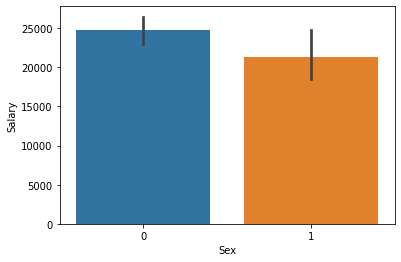

In [ ]:
sns.barplot(x='Sex',y='Salary',data=df)

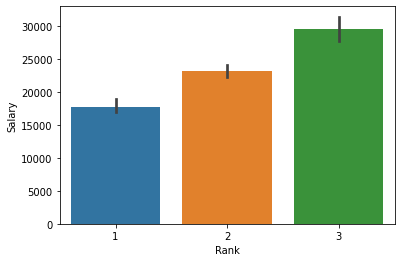

In [ ]:
sns.barplot(x='Rank',y='Salary',data=df)


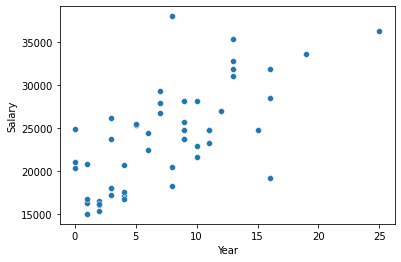

In [ ]:
sns.scatterplot(x='Year',y='Salary',data=df)

In [ ]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


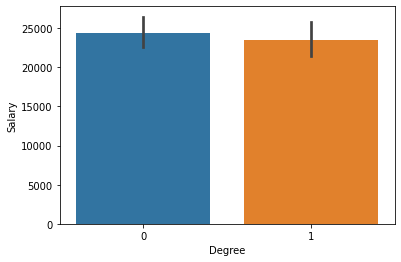

In [ ]:
sns.barplot(x='Degree',y='Salary',data=df)


In [ ]:
df[['Degree','Salary']].corr()


,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


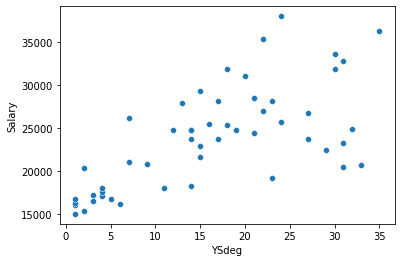

In [ ]:
sns.scatterplot(x='YSdeg',y='Salary',data=df)


In [ ]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [ ]:
X = df[['Sex', 'Rank', 'Year', 'YSdeg']].values
y = df['Salary'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
coeff = pd.DataFrame(model.coef_,['Sex', 'Rank', 'Year', 'YSdeg'],columns=['coefficent'])

In [ ]:
coeff

,coefficent
Sex,1620.797688
Rank,5408.101313
Year,453.169036
YSdeg,-79.872888


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([18514.86084314, 22986.15941456, 29091.44480542, 28504.59828477,
       21763.05815416, 17548.65378454, 15927.85609638, 20403.5510449 ,
       29865.7734065 , 27198.8957717 , 16221.27935671, 17548.65378454,
       18295.24608129])

In [ ]:
print("R2_score",metrics.r2_score(y_test,y_pred))

R2_score 0.8256543423046074


# Sex is the second biggest factor in the Salary, As you can see 0(male) is getting more salary compared to 1(fenale)